# 检查PIN状态，自发alpha正常

In [1]:
import csns_read_alpha_1 as cra
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def file_ana(junk,store,baseline_points = 1000,polarize = 1,datafile_path = r'F:\11695\\'):
    peak_e = cra.WF_ANA_File(junk,datafile_path=datafile_path)
    peak_e.analyse(peak_e.peak_ana_simple,baseline_points=baseline_points,polarize=polarize)
    aaa = np.array(peak_e.peak_list).T
    junk['peak_amp'] = aaa[0]
    junk['peak_time'] = aaa[1]
    junk['baseline'] = aaa[2]
    store.append('data_ana',junk,format='table', data_columns=True,index = False)

def plot_hist2d(file_numb,store,board_id = 3,channel = 2,set_clim = -1,bins=100):
    junk = store.select('data_ana','board_id = %i & channel = %i & file_numb = %i' %(board_id,channel,file_numb))
    test = plt.hist2d(junk['peak_time'],junk['peak_amp'],bins=bins)
    cbar = plt.colorbar()
    if set_clim != -1:
        cbar.set_clim(set_clim)
    
def file_save(file_numb,store,run_numb = 11696,datafile_path = '',board_id = -1):
    filename = datafile_path + 'daq-%i-NORM-%02i.raw' % (run_numb,file_numb)
    a = cra.CSNS_Index(filename)
    if board_id == -1:
        data = a.data
    else:
        data = a.data[a.data['board_id'] == board_id]
    store.append('data',data,format='table', data_columns=True,index = False)

In [44]:
%%time
store = pd.HDFStore( r'D:\root\11702.h5')
for i in range(9):
    file_save(i+1,store,run_numb = 11702,datafile_path = r'F:\11699\\')

Wall time: 50.9 s


In [45]:
%%time
# 分析能量信号波形信息
for i in range(9):
    junk = store.select('data','board_id = %i & channel = %i & file_numb = %i & run_numb = %i' %(3,2,i+1,11702))
    file_ana(junk,store,baseline_points = 1000,polarize = 1,datafile_path = r'F:\11699\\')

Wall time: 50.6 s


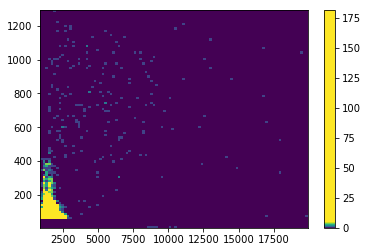

In [50]:
junk = store.select('data_ana','board_id = %i & channel = %i & peak_time <20000' %(3,2))
test = plt.hist2d(junk['peak_time'],junk['peak_amp'],bins=100)
cbar = plt.colorbar()
cbar.set_clim([0,5])

In [51]:
file_save(89,store,run_numb = 11702,datafile_path = r'F:\11699\\')
file_save(90,store,run_numb = 11702,datafile_path = r'F:\11699\\')
junk = store.select('data','board_id = %i & channel = %i & file_numb = %i & run_numb = %i' %(3,2,89,11702))
file_ana(junk,store,baseline_points = 1000,polarize = 1,datafile_path = r'F:\11699\\')
junk = store.select('data','board_id = %i & channel = %i & file_numb = %i & run_numb = %i' %(3,2,90,11702))
file_ana(junk,store,baseline_points = 1000,polarize = 1,datafile_path = r'F:\11699\\')

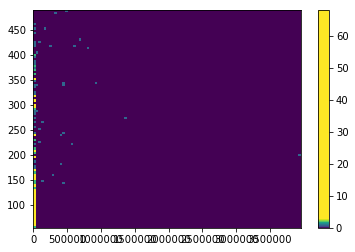

In [57]:
data_plot = store.select('data_ana','board_id = %i & channel = %i & file_numb > 88 ' %(3,2))
test = plt.hist2d(data_plot['peak_time'],data_plot['peak_amp'],bins=100)
cbar = plt.colorbar()
cbar.set_clim([0,3])

In [59]:
file_save(87,store,run_numb = 11702,datafile_path = r'F:\11699\\')
junk = store.select('data','board_id = %i & channel = %i & file_numb = %i & run_numb = %i' %(3,2,87,11702))
file_ana(junk,store,baseline_points = 1000,polarize = 1,datafile_path = r'F:\11699\\')

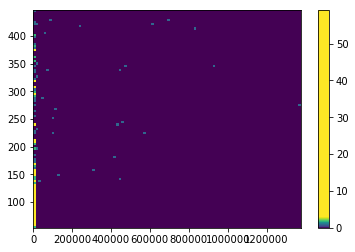

In [83]:
data_plot = store.select('data_ana','board_id = %i & channel = %i & file_numb =[89,90] & peak_time < 3000000 & peak_amp < 450 ' %(3,2))
test = plt.hist2d(data_plot['peak_time'],data_plot['peak_amp'],bins=100)
cbar = plt.colorbar()
cbar.set_clim([0,3])

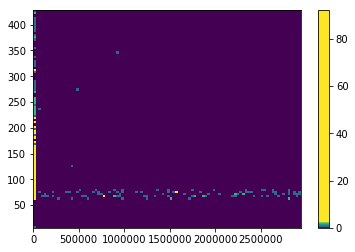

In [85]:
data_plot = store.select('data_ana','board_id = %i & channel = %i & file_numb =[8,9] & peak_time < 3000000 & peak_amp < 450' %(3,2))
test = plt.hist2d(data_plot['peak_time'],data_plot['peak_amp'],bins=100)
cbar = plt.colorbar()
cbar.set_clim([0,3])

In [68]:
file_save(88,store,run_numb = 11702,datafile_path = r'F:\11699\\')
junk = store.select('data','board_id = %i & channel = %i & file_numb = %i & run_numb = %i' %(3,2,88,11702))
file_ana(junk,store,baseline_points = 1000,polarize = 1,datafile_path = r'F:\11699\\')

In [69]:
data_plot = store.select('data_ana','board_id = %i & channel = %i' %(3,2))

data_plot['file_numb'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 89, 90, 87, 88], dtype=int64)

In [70]:
%%time
# 分析能量信号波形信息
for i in range(4):
    junk = store.select('data','board_id = %i & channel = %i & file_numb = %i & run_numb = %i' %(2,1,i+87,11702))
    file_ana(junk,store,baseline_points = 110,polarize = -1,datafile_path = r'F:\11699\\')

Wall time: 4min 6s


In [87]:
import tof

In [88]:
tof.t_to_e(10000000,flight_length=56)

1.6392781439999998e-07

## $\alpha$粒子刻度实验
run number : 11712

In [3]:
datafile_path = r'F:\single\\'
filename = datafile_path + 'daq-%i-NORM-%02i.raw' % (11712,1)

In [4]:
a = cra.CSNS_Index(filename)
junk = a.data[a.data['board_id'] == 2]

In [5]:
junk

,board_id,signal_len,start_flag_x,detector_type,trigger,fdm_t0_id,tof_time,tof_time_correction,channel,t0_id,...,start_flag_y,tcm_t0_id,tcm_time_s,tcm_time_ns,tcm_time,tcm_time_correct,t0_index,file_numb,run_numb,address
0,2,1008,235,0,0,1,4813360,165,1,1,...,235,1,1541031409,4123063010,6618679507886863074,22,0,1,11712,124
1,2,1008,235,0,0,1,6461920,165,1,1,...,235,1,1541031409,4123063010,6618679507886863074,22,0,1,11712,1132
2,2,1008,235,0,0,1,9952248,165,1,1,...,235,1,1541031409,4123063010,6618679507886863074,22,0,1,11712,2140
3,2,1008,235,0,0,0,1030472,165,1,0,...,235,0,1541031409,4118063009,6618679507881863073,50,1,1,11712,3204
4,2,1008,235,0,0,0,4028760,165,1,0,...,235,0,1541031409,4118063009,6618679507881863073,50,1,1,11712,4212
5,2,1008,235,0,0,0,5219344,165,1,0,...,235,0,1541031409,4118063009,6618679507881863073,50,1,1,11712,5220
6,2,1008,235,0,0,0,6647640,165,1,0,...,235,0,1541031409,4118063009,6618679507881863073,50,1,1,11712,6228
7,2,1008,235,0,0,0,8931240,165,1,0,...,235,0,1541031409,4118063009,6618679507881863073,50,1,1,11712,7236
8,2,1008,235,0,0,2,2358400,164,1,2,...,235,2,1541031409,4128063011,6618679507891863075,7,2,1,11712,8300
9,2,1008,235,0,0,2,3099720,164,1,2,...,235,2,1541031409,4128063011,6618679507891863075,7,2,1,11712,9308


In [6]:
peak_e = cra.WF_ANA_File(junk,datafile_path=datafile_path)

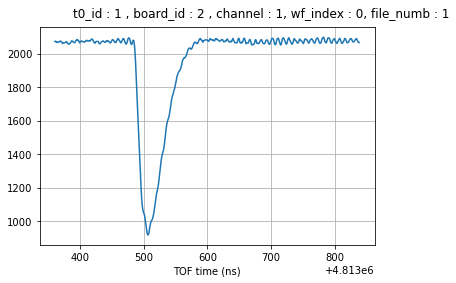

In [7]:
se = junk.iloc[0].astype('int64')
test = cra.WF_ANA(se,datafile_path= r'F:\single\\')

In [8]:
peak_e.analyse(peak_e.peak_ana_simple,baseline_points=80,polarize=-1)
aaa = np.array(peak_e.peak_list).T
junk['peak_amp'] = aaa[0]
junk['peak_time'] = aaa[1]
junk['baseline'] = aaa[2]

C:\Users\Administrator\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


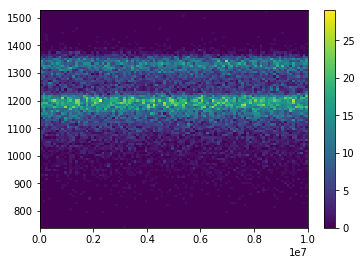

In [16]:
data_plot = junk[junk['peak_amp'] <2000][junk['peak_amp'] > 700].copy()
test = plt.hist2d(data_plot['peak_time'],data_plot['peak_amp'],bins=100)
cbar = plt.colorbar()

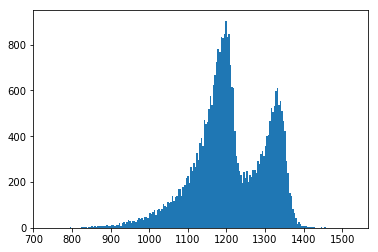

In [19]:
test = plt.hist(data_plot['peak_amp'],bins=200)

In [21]:
data = pd.Series(test[0],index = test[1][1:])

In [28]:
data1 = data[data.index < 1250]
data1.idxmax(),data1.max()

(1200.3205625000001, 904.0)

In [29]:
data2 = data[data.index > 1250]
data2.idxmax(),data2.max()

(1334.2741874999999, 609.0)

故道指分别对应5.275MeV和5.805MeV,能量道指刻度关系：

en = peak_amp*A + B

In [38]:
def en_from_peakamp(x):
    A = (5.805-5.275)/(1334.27418 - 1200.32056)
    B = 5.275 - 1200.32056*A
    return x*A + B

In [44]:
%timeit en_from_peakamp(1334)

The slowest run took 15.86 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 242 ns per loop
